Set Up Environment and Import Family Data

In [209]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import SelectFromModel, RFE, RFECV
from sklearn.linear_model import ElasticNetCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from abess import LinearRegression
from abess.decomposition import SparsePCA
from kennard_stone import train_test_split
# from genetic_selection import GeneticSelectionCV
import pandas as pd
import numpy as np

In [68]:
def extractDragonDescriptors(family_Y_df, descriptorFileString):
    family_X = pd.read_csv(descriptorFileString, sep='\t', index_col=0)
    colsX = family_X.columns
    family_X_resetIndex = pd.DataFrame(family_X.to_numpy(), index=family_Y_df.index, columns=family_X.columns).replace('na', np.NaN)
    return family_X_resetIndex[colsX[1:]].dropna(axis=1, how='any')

In [39]:
triph_Y = pd.read_csv('Data/exactPLS/triphenylamines.csv', index_col=0)
porph_Y = pd.read_csv('Data/exactPLS/porphyrins.csv', index_col=0)
pheno_Y = pd.read_csv('Data/exactPLS/phenothiazines.csv', index_col=0)
indol_Y = pd.read_csv('Data/exactPLS/indolines.csv', index_col=0)
couma_Y = pd.read_csv('Data/exactPLS/coumarins.csv', index_col=0)
carba_Y = pd.read_csv('Data/exactPLS/carbazoles.csv', index_col=0)
diphe_Y = pd.read_csv('Data/exactPLS/diphenylamines.csv', index_col=0)

,Molecule SMILE,PCE
S.No,,
1,CCCCCCC(Cc1cc(sc1c1cc2c(s1)c1sc(cc1c1c2non1)c1...,6.18
2,N#C/C(=C\c1ccc(cc1)/C=C/c1cccc(c1)N(c1ccccc1)c...,2.23
3,N#CC(=Cc1ccc(cc1)C=Cc1ccc(cc1)N(c1ccccc1)c1ccc...,4.12
4,N#CC(=Cc1cccc(c1)N(c1ccccc1)c1ccccc1)C(=O)O,1.27
5,N#CC(=Cc1ccc(cc1)N(c1ccccc1)c1ccccc1)C(=O)O,2.92
...,...,...
240,Oc1nc2ccc(cc2nc1O)c1ccc(cc1)N(c1ccccc1)c1ccccc1,1.18
241,Oc1nc2ccc(cc2nc1O)c1ccc(s1)c1ccc(cc1)N(c1ccccc...,1.58
242,CCCCC(COc1cc(OCC(CCCC)CC)ccc1c1ccc(cc1)N(c1ccc...,5.87


In [71]:
triph_X = extractDragonDescriptors(triph_Y, 'Data/exactPLS/desc_triphenylamines.txt')
porph_X = extractDragonDescriptors(porph_Y, 'Data/exactPLS/desc_porphyrins.txt')
pheno_X = extractDragonDescriptors(pheno_Y, 'Data/exactPLS/desc_phenothiazines.txt')
indol_X = extractDragonDescriptors(indol_Y, 'Data/exactPLS/desc_indolines.txt')
couma_X = extractDragonDescriptors(couma_Y, 'Data/exactPLS/desc_coumarins.txt')
carba_X = extractDragonDescriptors(carba_Y, 'Data/exactPLS/desc_carbazoles.txt')
diphe_X = extractDragonDescriptors(diphe_Y, 'Data/exactPLS/desc_diphenylamines.txt')

,MW,AMW,Se,Sp,Si,Me,Mp,Mi,GD,nAT,...,TPSA(NO),TPSA(Tot),LOGP99,LOGPcons,ESOL,SAacc,SAdon,Vx,VvdwMG,SAscore
S.No,,,,,,,,,,,,,,,,,,,,,
1,926.16,10.406292,92.7410,67.8244,100.5316,1.042034,0.762072,1.129569,0.036210,89,...,71.90,71.90,13.64730,10.274202,-12.507319,236.040349,42.683343,947.757475,391.802244,6.966613
2,974.70,7.273881,131.3807,94.8079,148.7023,0.980453,0.707522,1.109719,0.032712,134,...,71.90,71.90,15.65250,11.648990,-12.829856,101.399329,42.683343,1272.524917,524.903654,6.710840
3,1323.28,6.892083,187.8383,132.2403,213.9269,0.978324,0.688752,1.114203,0.023684,192,...,97.68,97.68,23.22050,16.095679,-18.089831,134.970388,42.683343,1770.431894,728.963891,7.544736
5,992.62,7.877937,124.2827,92.2509,139.2077,0.986371,0.732150,1.104823,0.032473,126,...,97.68,97.68,15.38834,10.642230,-13.174928,134.970388,42.683343,1241.029900,511.995861,7.051546
7,1230.14,6.910899,174.0857,122.9504,198.1830,0.978010,0.690733,1.113388,0.025281,178,...,75.14,75.14,21.56210,15.721231,-16.562790,104.523643,42.683343,1656.644518,682.329721,7.341659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,837.30,8.907447,93.3449,73.6312,102.5574,0.993031,0.783311,1.091036,0.038798,94,...,75.14,75.14,12.12650,9.051484,-11.076743,104.523643,42.683343,1001.295681,413.744132,6.521043
297,853.30,8.982105,94.6722,74.0857,103.7668,0.996549,0.779849,1.092282,0.038075,95,...,95.37,95.37,11.83210,8.785619,-10.983116,147.206986,85.366686,1011.046512,417.740374,6.518551
298,888.35,8.973232,98.4467,77.6369,108.0557,0.994411,0.784211,1.091472,0.036058,99,...,98.93,98.93,12.41988,8.857075,-11.128602,135.582999,42.683343,1066.661130,440.533250,6.635670


In [72]:
triph_X.shape,porph_X.shape,pheno_X.shape,indol_X.shape,couma_X.shape,carba_X.shape,diphe_X.shape

((229, 851),
 (281, 723),
 (207, 673),
 (160, 554),
 (56, 630),
 (179, 603),
 (35, 481))

Divide Family Datasets Into Train and Test (0.3)

In [139]:
from kennard_stone import train_test_split

triph_X_train, triph_X_test, triph_Y_train, triph_Y_test = train_test_split(triph_X, triph_Y['PCE'], test_size=0.3)
porph_X_train, porph_X_test, porph_Y_train, porph_Y_test = train_test_split(porph_X, porph_Y['PCE'], test_size=0.3)
pheno_X_train, pheno_X_test, pheno_Y_train, pheno_Y_test = train_test_split(pheno_X, pheno_Y['PCE'], test_size=0.3)
indol_X_train, indol_X_test, indol_Y_train, indol_Y_test = train_test_split(indol_X, indol_Y['PCE'], test_size=0.3)
couma_X_train, couma_X_test, couma_Y_train, couma_Y_test = train_test_split(couma_X, couma_Y['PCE'], test_size=0.3)
carba_X_train, carba_X_test, carba_Y_train, carba_Y_test = train_test_split(carba_X, carba_Y['PCE'], test_size=0.3)
diphe_X_train, diphe_X_test, diphe_Y_train, diphe_Y_test = train_test_split(diphe_X, diphe_Y['PCE'], test_size=0.3)

In [140]:
porph_X_train.shape, triph_X_train.shape, diphe_X_train.shape

((196, 723), (160, 851), (24, 481))

Remove Intercorrelated Descriptors

In [141]:
def returnNextRow(rowDf, to_drop):
    max = -200
    nextRow='None'
    for i in range(len(rowDf.columns)):
        if (rowDf[rowDf.columns[i]][0] > max) and (rowDf.columns[i] not in to_drop) and (rowDf[rowDf.columns[i]][0] != np.NaN):
            max = rowDf[rowDf.columns[i]][0]
            nextRow = rowDf.columns[i]
    return nextRow

def getTo_dropOfRow(rowDf, to_drop=[], threshold=0.95):
    for i in range(len(rowDf.columns)):
        if (rowDf[rowDf.columns[i]][0] > threshold) and (rowDf[rowDf.columns[i]][0] != np.NaN) and (rowDf.columns[i] not in to_drop):
            to_drop.append(rowDf.columns[i])
    return to_drop

def vWSPFeatureSelect(rowName,corr_matrix,to_drop=[],thresh=0.95):
    if rowName=='None':
        return to_drop
    else:
        to_DropThisRow = getTo_dropOfRow(corr_matrix.loc[[rowName]], to_drop, threshold=thresh) #array of column names
        nextRow = returnNextRow(corr_matrix.loc[[rowName]], to_DropThisRow)
        updateTo_drop = to_DropThisRow
        return vWSPFeatureSelect(rowName=nextRow, corr_matrix=corr_matrix,to_drop=updateTo_drop, thresh=0.95)
    
def vWSP(X_train, threshold=0.95):
    cor_matrix = X_train.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    to_drop=vWSPFeatureSelect('MW', corr_matrix=upper_tri, to_drop=[], thresh=threshold) #MW chosen as seed
    X_train_rm = X_train.drop(to_drop, axis=1)
    return X_train_rm

In [142]:
porph_X_train_rmCorr = vWSP(porph_X_train, threshold=0.95)
triph_X_train_rmCorr = vWSP(triph_X_train, threshold=0.95)
pheno_X_train_rmCorr = vWSP(pheno_X_train, threshold=0.95)
indol_X_train_rmCorr = vWSP(indol_X_train, threshold=0.95)
couma_X_train_rmCorr = vWSP(couma_X_train, threshold=0.95)
carba_X_train_rmCorr = vWSP(carba_X_train, threshold=0.95)
diphe_X_train_rmCorr = vWSP(diphe_X_train, threshold=0.95)

In [143]:
porph_X_train_rmCorr.shape, triph_X_train_rmCorr.shape, pheno_X_train_rmCorr.shape, indol_X_train_rmCorr.shape 

((196, 674), (160, 802), (144, 620), (112, 500))

Selecting From Linear Regression Directly

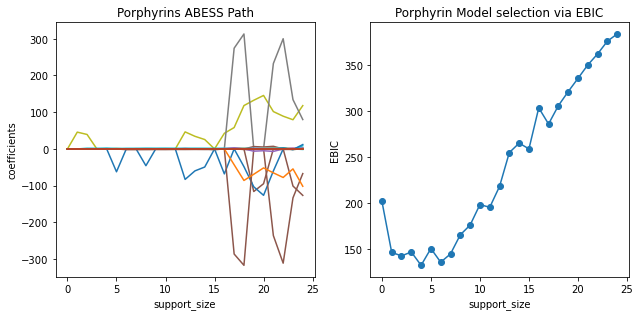

In [125]:
fig, axs = plt.subplots(1,2, figsize=(9, 4.5), tight_layout=True)

vis_porph_coef = np.zeros((25,674))
vis_porph_ic = np.zeros(25)

for s in range(25):
    vis_porph_linModel = LinearRegression(support_size=s)
    vis_porph_linModel.fit(np.array(porph_X_train_rmCorr), porph_Y_train)
    vis_porph_coef[s, :] = vis_porph_linModel.coef_
    vis_porph_ic[s] = vis_porph_linModel.ic_

for i in range(674):
    axs[0].plot(vis_porph_coef[:, i], label=i)

axs[0].set_xlabel('support_size')
axs[0].set_ylabel('coefficients')
axs[0].set_title('Porphyrins ABESS Path')

axs[1].plot(vis_porph_ic,'o-')
axs[1].set_xlabel('support_size')
axs[1].set_ylabel('EBIC')
axs[1].set_title('Porphyrin Model selection via EBIC')
plt.show()


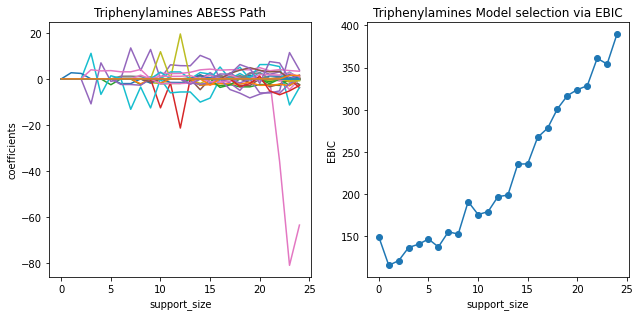

In [128]:
fig, axs = plt.subplots(1,2, figsize=(9, 4.5), tight_layout=True)

vis_triph_coef = np.zeros((25,802))
vis_triph_ic = np.zeros(25)

for s in range(25):
    vis_triph_linModel = LinearRegression(support_size=s)
    vis_triph_linModel.fit(np.array(triph_X_train_rmCorr), triph_Y_train)
    vis_triph_coef[s, :] = vis_triph_linModel.coef_
    vis_triph_ic[s] = vis_triph_linModel.ic_

for i in range(802):
    axs[0].plot(vis_triph_coef[:, i], label=i)

axs[0].set_xlabel('support_size')
axs[0].set_ylabel('coefficients')
axs[0].set_title('Triphenylamines ABESS Path')

axs[1].plot(vis_triph_ic,'o-')
axs[1].set_xlabel('support_size')
axs[1].set_ylabel('EBIC')
axs[1].set_title('Triphenylamines Model selection via EBIC')
plt.show()

Optimum Via Abess

In [203]:
def retrieveAbessFeatures(input_X_train, input_X_test, input_Y_train, input_Y_test, n_features=0):
    if n_features==0:
        linModel = LinearRegression(support_size=range(20), ic_type='aic')
    else:
        linModel = LinearRegression(support_size=n_features)
    
    scaled_X_train = scaleData(input_X_train)
    
    linModel.fit(np.array(scaled_X_train), input_Y_train)
    ind = np.nonzero(linModel.coef_)
    descriptorArray = input_X_train.columns[ind]
    
    plsModel = PLSRegression(n_components=2)
    plsModel.fit(input_X_train[descriptorArray], input_Y_train)
    predict_train = plsModel.predict(input_X_train[descriptorArray])
    predict_test = plsModel.predict(input_X_test[descriptorArray])
    r2_train = r2_score(input_Y_train, predict_train)
    r2_test = r2_score(input_Y_test, predict_test)
    
    return descriptorArray, r2_train, r2_test

def scaleData(train_X):
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(train_X)
    scaled_df = pd.DataFrame(scaled_array, index=train_X.index, columns=train_X.columns)
    return scaled_df

def retrieveLassoFeatures(input_X_train, input_X_test, input_Y_train, input_Y_test, n_features=25):
    scaled_X_train = scaleData(input_X_train)
    
    lasso_model = LassoCV(alphas=np.arange(0.1, 2, 0.1))
    lasso_model.fit(scaled_X_train, input_Y_train)
    
    importance_lasso = np.abs(lasso_model.coef_)
    threshold_lasso = np.sort(importance_lasso)[-n_features]+0.0001
    sfm_lasso = SelectFromModel(lasso_model, threshold=threshold_lasso).fit(scaled_X_train, input_Y_train)
    descriptorArray = input_X_train.columns[sfm_lasso.get_support()]
    
    plsModel = PLSRegression(n_components=2)
    plsModel.fit(input_X_train[descriptorArray], input_Y_train)
    
    predict_train = plsModel.predict(input_X_train[descriptorArray])
    predict_test = plsModel.predict(input_X_test[descriptorArray])
    r2_train = r2_score(input_Y_train, predict_train)
    r2_test = r2_score(input_Y_test, predict_test)
    
    return descriptorArray, r2_train, r2_test

def retrieveElasticNetFeatures(input_X_train, input_X_test, input_Y_train, input_Y_test, n_features=25):
    scaled_X_train = scaleData(input_X_train)
    
    en_model = ElasticNetCV(alphas=np.arange(0.1, 2, 0.1)).fit(scaled_X_train, input_Y_train)
    
    importance_en = np.abs(en_model.coef_)
    threshold_en = np.sort(importance_en)[-n_features]+0.0001
    sfm_en = SelectFromModel(en_model, threshold=threshold_en).fit(scaled_X_train, input_Y_train)
    descriptorArray = input_X_train.columns[sfm_en.get_support()]
    
    plsModel = PLSRegression(n_components=2)
    plsModel.fit(input_X_train[descriptorArray], input_Y_train)
    
    predict_train = plsModel.predict(input_X_train[descriptorArray])
    predict_test = plsModel.predict(input_X_test[descriptorArray])
    
    r2_train = r2_score(input_Y_train, predict_train)
    r2_test = r2_score(input_Y_test, predict_test)
    
    return descriptorArray, r2_train, r2_test

In [215]:
porphDescs, porph_r2Train, porph_r2Test = retrieveLassoFeatures(porph_X_train_rmCorr, porph_X_test, porph_Y_train, porph_Y_test, n_features=12)
triphDescs, triph_r2Train, triph_r2Test = retrieveLassoFeatures(triph_X_train_rmCorr, triph_X_test, triph_Y_train, triph_Y_test, n_features=13)
phenoDescs, pheno_r2Train, pheno_r2Test = retrieveLassoFeatures(pheno_X_train_rmCorr, pheno_X_test, pheno_Y_train, pheno_Y_test, n_features=14)
indolDescs, indol_r2Train, indol_r2Test = retrieveLassoFeatures(indol_X_train_rmCorr, indol_X_test, indol_Y_train, indol_Y_test, n_features=13)
coumaDescs, couma_r2Train, couma_r2Test = retrieveLassoFeatures(couma_X_train_rmCorr, couma_X_test, couma_Y_train, couma_Y_test, n_features=5)
carbaDescs, carba_r2Train, carba_r2Test = retrieveLassoFeatures(carba_X_train_rmCorr, carba_X_test, carba_Y_train, carba_Y_test, n_features=11)
dipheDescs, diphe_r2Train, diphe_r2Test = retrieveLassoFeatures(diphe_X_train_rmCorr, diphe_X_test, diphe_Y_train, diphe_Y_test, n_features=4)


print(f"Descriptors Porph: {porphDescs}\nr2 Train: {porph_r2Train}\nr2 Test {porph_r2Test}\n")
print(f"Descriptors Triph: {triphDescs}\nr2 Train: {triph_r2Train}\nr2 Test {triph_r2Test}\n")
print(f"Descriptors Pheno: {phenoDescs}\nr2 Train: {pheno_r2Train}\nr2 Test {pheno_r2Test}\n")
print(f"Descriptors Indol: {indolDescs}\nr2 Train: {indol_r2Train}\nr2 Test {indol_r2Test}\n")
print(f"Descriptors Couma: {coumaDescs}\nr2 Train: {couma_r2Train}\nr2 Test {couma_r2Test}\n")
print(f"Descriptors Carba: {carbaDescs}\nr2 Train: {carba_r2Train}\nr2 Test {carba_r2Test}\n")
print(f"Descriptors Diphe: {dipheDescs}\nr2 Train: {diphe_r2Train}\nr2 Test {diphe_r2Test}\n")
# print(f"Descriptors: {dipheDescs}\nr2 Train: {diphe_r2Train}\nr2 Test {diphe_r2Test}")

C:\Users\clarkep\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012395093049024197, tolerance: 0.011462819687500002
  model = cd_fast.enet_coordinate_descent(
C:\Users\clarkep\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012395093049024197, tolerance: 0.011462819687500002
  model = cd_fast.enet_coordinate_descent(


Descriptors Porph: Index(['Eta_D_epsiD', 'N-071', 'N-072', 'SssCH2', 'mintsC', 'B03[N-O]',
       'B10[N-O]', 'B10[N-X]', 'F03[N-N]', 'F06[N-O]', 'F07[C-X]'],
      dtype='object')
r2 Train: 0.6428051111983262
r2 Test 0.6277232224529852

Descriptors Triph: Index(['nArCOOH', 'nImidazoles', 'C-005', 'C-029', 'minsssCH', 'B02[N-N]',
       'B02[N-S]', 'B04[N-O]', 'B06[C-O]', 'B07[O-S]', 'B09[C-S]', 'F09[C-O]'],
      dtype='object')
r2 Train: 0.65389092698478
r2 Test 0.3536212635193209

Descriptors Pheno: Index(['totalcharge', 'X0Av', 'NsssCH', 'mindssC', 'B03[N-S]', 'B04[N-O]',
       'B04[O-S]', 'B07[N-S]', 'B08[C-O]', 'B08[N-F]', 'F04[O-O]', 'F05[S-S]',
       'F09[S-S]'],
      dtype='object')
r2 Train: 0.6609648319762238
r2 Test 0.4362633732932025

Descriptors Indol: Index(['N%', 'C-033', 'C-043', 'SsssCH', 'minsCH3', 'MaxdssC', 'B02[N-O]',
       'B04[S-S]', 'B07[N-N]', 'B08[N-N]', 'F07[N-S]', 'F09[S-S]'],
      dtype='object')
r2 Train: 0.679697438473289
r2 Test 0.49575616497789976

Index(['X1Av', 'mintsC', 'B10[N-X]', 'F03[N-N]'], dtype='object')

(0.5140885503753247, 0.551232453323478)

Optimum Via Literature:
13 Triphenylamines, 14 Phenothiazines, 13 Indolines, 12 Porphyrins, 
5 Coumarins, 11 Carbazoles, 4 Diphenylamines

In [205]:
porphDescs, porph_r2Train, porph_r2Test = retrieveAbessCorrelation(porph_X_train_rmCorr, porph_X_test, porph_Y_train, porph_Y_test, supp_size=12)
triphDescs, triph_r2Train, triph_r2Test = retrieveAbessCorrelation(triph_X_train_rmCorr, triph_X_test, triph_Y_train, triph_Y_test,supp_size=13)
phenoDescs, pheno_r2Train, pheno_r2Test = retrieveAbessCorrelation(pheno_X_train_rmCorr, pheno_X_test, pheno_Y_train, pheno_Y_test, supp_size=14)
indolDescs, indol_r2Train, indol_r2Test = retrieveAbessCorrelation(indol_X_train_rmCorr, indol_X_test, indol_Y_train, indol_Y_test, supp_size=13)
coumaDescs, couma_r2Train, couma_r2Test = retrieveAbessCorrelation(couma_X_train_rmCorr, couma_X_test, couma_Y_train, couma_Y_test, supp_size=5)
carbaDescs, carba_r2Train, carba_r2Test = retrieveAbessCorrelation(carba_X_train_rmCorr, carba_X_test, carba_Y_train, carba_Y_test, supp_size=11)
dipheDescs, diphe_r2Train, diphe_r2Test = retrieveAbessCorrelation(diphe_X_train_rmCorr, diphe_X_test, diphe_Y_train, diphe_Y_test, supp_size=4)

print(f"Porph Descriptors: {porphDescs}\nr2 Train: {porph_r2Train}\nr2 Test {porph_r2Test}\n")
print(f"Triph Descriptors: {triphDescs}\nr2 Train: {triph_r2Train}\nr2 Test {triph_r2Test}\n")
print(f"Pheno Descriptors: {phenoDescs}\nr2 Train: {pheno_r2Train}\nr2 Test {pheno_r2Test}\n")
print(f"Indol Descriptors: {indolDescs}\nr2 Train: {indol_r2Train}\nr2 Test {indol_r2Test}\n")
print(f"Couma Descriptors: {coumaDescs}\nr2 Train: {couma_r2Train}\nr2 Test {couma_r2Test}\n")
print(f"Carba Descriptors: {carbaDescs}\nr2 Train: {carba_r2Train}\nr2 Test {carba_r2Test}\n")
print(f"Diphe Descriptors: {dipheDescs}\nr2 Train: {diphe_r2Train}\nr2 Test {diphe_r2Test}")

NameError: name 'retrieveLassoCorrelation' is not defined

In [211]:
porph_X_train_sansCorr = vWSP(porph_X_train, threshold=0.5)
triph_X_train_sansCorr = vWSP(triph_X_train, threshold=0.5)
pheno_X_train_sansCorr = vWSP(pheno_X_train, threshold=0.5)
indol_X_train_sansCorr = vWSP(indol_X_train, threshold=0.5)
couma_X_train_sansCorr = vWSP(couma_X_train, threshold=0.5)
carba_X_train_sansCorr = vWSP(carba_X_train, threshold=0.5)
diphe_X_train_sansCorr = vWSP(diphe_X_train, threshold=0.5)

In [228]:
modelRF = RandomForestRegressor(n_estimators=2000)

modelRF.fit(carba_X_train_sansCorr, carba_Y_train)

predict_train = modelRF.predict(carba_X_train[carba_X_train_sansCorr.columns])

predict_test = modelRF.predict(carba_X_test[carba_X_train_sansCorr.columns])

r2_train = r2_score(carba_Y_train, predict_train)

r2_test = r2_score(carba_Y_test, predict_test)

r2_train, r2_test

(0.943497790329622, 0.4320787445097811)